# Quiz 3

LIS MASc  
Engaging Complexity

Access this notebook on [GitHub](https://github.com/noah-art3mis/complexity/)  
PDF generated using [nbconvert](https://nbconvert.readthedocs.io/en/latest/index.html)


In [122]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 300

## 1


In [123]:
RULESET = {
    '111': 0,
    '011': 1,
    '101': 0,
    '001': 1,
    '110': 0,
    '010': 0,
    '100': 1,
    '000': 1
 }

Putting these in order, we get:

In [124]:
ORDERED = {
    '111': 0,
    '110': 0,
    '101': 0,
    '100': 1,
    '011': 1,
    '010': 0,
    '001': 1,
    '000': 1
 }

In [125]:
def get_rule_name(ruleset):
    rule = ''.join(str(x) for x in ruleset.values())
    return int(rule, 2)

print(f'This is rule {get_rule_name(ORDERED)}')

This is rule 27


Let's calculate and plot it.

In [126]:
def make_grid(rows, cols):
    grid = [[0 for _ in range(cols)] for _ in range(rows)]
    grid[0][int(cols/2)] = 1 # set seed
    return grid 

In [127]:
def update_grid(grid, ruleset):
    # skip first row since it is the seed
    for i in range(1, len(grid[0])):
        # apply the ruleset to the previous row
        grid[i] = apply_ruleset(grid[i - 1], ruleset)
        
def apply_ruleset(row: list, ruleset) -> list:
    next_row = []
    
    for i in range(len(row)):

        # this handles the edges as if they were connected 
        l = row[(i - 1 + len(row)) % len(row)]
        x = row[i]
        r = row[(i + 1 + len(row)) % len(row)]
        
        kernel_state = str(l) + str(x) + str(r)
                
        result = ruleset.get(kernel_state, np.nan)
        
        next_row.append(result)
   
    return next_row

In [128]:
import matplotlib.pyplot as plt

def plot_grid(grid, name):
    plt.figure(figsize=(2,2))
    plt.imshow(grid, cmap="gray_r", interpolation="nearest")
    plt.axis('off')
    plt.title(f"Rule {name}");
    

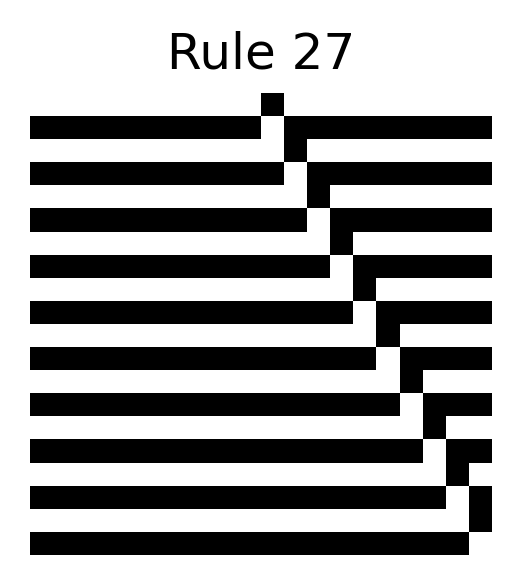

In [129]:
ROWS = 20
COLS = 20

grid = make_grid(ROWS, COLS)
update_grid(grid, ORDERED)
plot_grid(grid, get_rule_name(ORDERED))

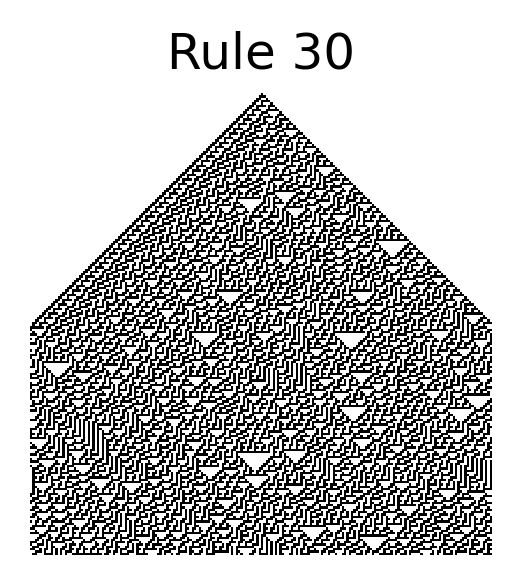

In [130]:
ROWS = 200
COLS = 200

EXTRA = {
    '111': 0,
    '110': 0,
    '101': 0,
    '100': 1,
    '011': 1,
    '010': 1,
    '001': 1,
    '000': 0
 }

grid = make_grid(ROWS, COLS)
update_grid(grid, EXTRA)
plot_grid(grid, get_rule_name(EXTRA))

## 2

### a)

The number of squares ($N$) added each iteration ($N_n$) can be counted in the picture as:

$N_1$ = 0 = 4 * 0

$N_2$ = 4 = 4 * 1

$N_3$ = 12 = 4 * 3 

$N_4$ = 36 = 4 * 9 

In a general form:

$$N_n = 3^{n-2} \cdot 4, \quad{n > 1}$$

Thus, for $n = 4$:

$N_n = 3^{n-2} \cdot 4$

$N_4 = 3^{4-2} \cdot 4$

$N_4 = 9 \cdot 4$

$N_4 = 36$

$S_4$ has $36$ new squares.


The side of of the squares ($L_n$) added each iteration can be thought of as such:

$L_1 = a$

$L_2 = \frac{a}{3}$

$L_3 = \frac{a}{9}$

Or, in a general form:

$$L_n = \frac{a}{3^{n - 1}}, \quad{n > 0}$$

Thus, for $n = 4$:

$L_n = \frac{a}{3^{n - 1}}$

$L_4 = \frac{a}{3^{4 - 1}}$

$L_4 = \frac{a}{27}$

$S_4$ has new squares with side $\frac{a}{27}$



### b)

We can imagine the process of adding a new square as the square being extruded from its corresponding face. This means that we are adding two new sides with 1/3 of the dimensions of the previous side. (Another way to think of this would me imagining that the square removes one face from the previous square, while also adding 3 new ones; This effectively adds 2 new faces of length $a/3$). Representing this as a recursive function, we have:

$L_2 = L_1 + 2 \cdot \frac{L_1}{3}$

$L_3 = L_2 + 3 \cdot 2 \cdot \frac{L_1}{9}$

where $L_n$ is the length of one of the sides of the square in a given iteration $S_n$. The $3$ in the second equation represents the number of squares added to a given side.

Considering $L_1 = a$, we have

$L_2 = a + \frac{2a}{3}$

$L_2 = \frac{5a}{3}$

Since we want the perimeter and the shape is a square, we multiply the length of the side by four, giving us.

$$P_2 = \frac{20a}{3}$$

With this value, we can now simplify the equation of the next iteration as well:

$L_3 = L_2 + 3 \cdot 2 \cdot \frac{L_1}{9}$

$L_3 = \frac{5a}{3} + \frac{6a}{9}$

$L_3 = \frac{7a}{3}$


Since we are looking for the perimiter, we get:

$P_3 = \frac{7a}{3} \cdot 4$

or

$$P_3 = \frac{28a}{3}$$





### c)

Considering the information from the previous section and rearranging the terms to look similar, we have:

$L_2 = L_1 + 3^0 \cdot 2 \cdot \frac{L_1}{3^1}$

$L_3 = L_2 + 3^1 \cdot 2 \cdot \frac{L_1}{3^2}$

by doing this we can infer a general formula:

$L_n = L_{n-1} + 3^{n-2} \cdot 2 \cdot \frac{L_1}{3^{n-1}}$

We want to find the perimeter ($P_n$). We can find that by multiplying the length of the sides by the number of sides (four, since this is a square). We only do this on the right side of the equation; since this is a recursive function, the previous iteration was already multiplied by the number of sides. In that way, we get

$P_n = P_{n-1} + 3^{n-2} \cdot 2 \cdot \frac{L_1}{3^{n-1}} \cdot 4$

Which we can simplify in the following way:

$P_n = P_{n-1} + \frac{3^{n-2} \cdot 8L_1}{3^{n-1}}$

$P_n = P_{n-1} + 8L_1 \cdot \frac{3^{n-2}}{3^{n-1}}$

$P_n = P_{n-1} + 8L_1 \cdot 3^{n-2-n+1}$

$P_n = P_{n-1} + 8L_1 \cdot 3^{-1}$

$P_n = P_{n-1} + 2L_1 \cdot \frac{4}{3}$

Since $L_1 = a$, we represent the formula for calculating the perimeter of a given iteration ($S_n$) by

$$P_n = P_{n-1} + 2a \cdot \frac{4}{3}, \quad{n > 1}$$

$n$ cannot be lower than $2$ as it would represent a fractional number of new squares, which is impossible. We leave the 4/3 isolated as it is a common ratio that emerges in complexity science ([Mitchell, 2009](https://academic.oup.com/book/51004)).

Checking the previous results:

$P_1 = 4a$

$P_2 = P_{1} + \frac{8a}{3}$

$P_2 = 4a + \frac{8a}{3}$

$P_2 = \frac{12 + 8a}{3}$

$$P_2 = \frac{20a}{3}$$

and 

$P_3 = P_{2} + \frac{8a}{3}$

$P_3 = \frac{20a}{3} + \frac{8a}{3}$

$$P_3 = \frac{28a}{3}$$



### d)

$$P_n = P_{n-1} + 2a \cdot \frac{4}{3}, \quad{n > 1}$$

$a$ is a length, so it will always be a positive number. Since the first iteration is always positive and the next iterations will multiply it by ~2.6 and sum it to the previous value, it will increase forever in a linear fashion. 

We can verify this using a plot:

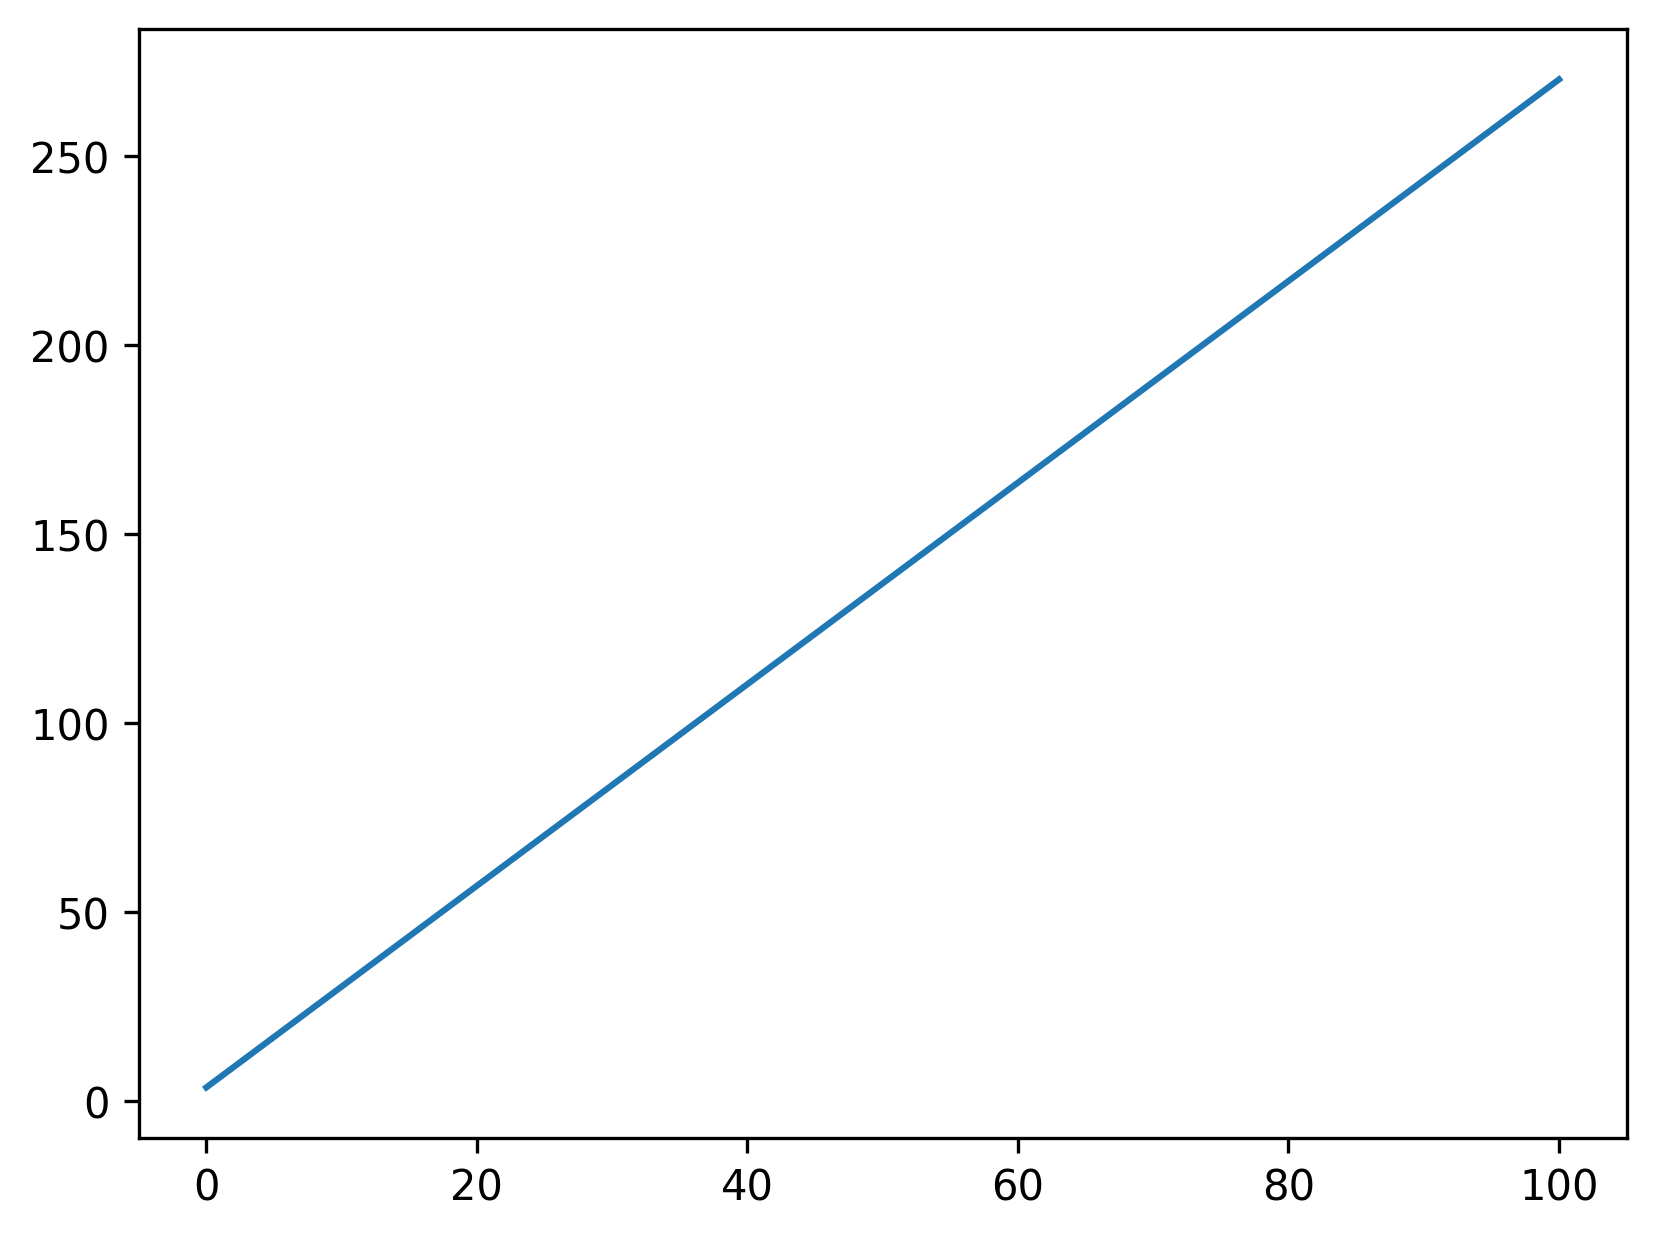

In [131]:
def perimeter(previous: float, a: float = 1) -> float:
    return previous + (2 * a * 4/3)

L_1 = 1
xy = dict()
xy[0] = perimeter(L_1)

for i in range(1, 101):
    previous = xy[i-1]
    xy[i] = perimeter(previous)

import matplotlib.pyplot as plt
plt.plot(xy.keys(), xy.values());


### e)

The area ($A_n$) of an iteration ($S_n$) is given by the area of the previous iteration plus the area of a new square multiplied by the number of new squares. 

$$A_n = A_{n-1} + s_n^2 \cdot N_n$$

$s_n$ is the side of a new square. With the information given:

$s_1 = a$

$s_2 = a/3$

$s_3 = a/9$

By this, we can infer that

$$s_n = a/3^{n-1}$$

$N_n$ is the number of new squares in a given iteration. With the information given:

$N_2 = 4$

$N_3 = 12$

From which we can infer that 

$$N_n = 4 \cdot 3^{n-2}$$

Substituting:

$A_n = A_{n-1} + (a/3^{n-1})^2 \cdot 4 \cdot 3^{n-2}$

$A_n = A_{n-1} + 4a^2 \cdot \frac{3^{n-2}}{3^{2n-2}}$

$A_n = A_{n-1} + 4a^2 \cdot 3^{n-2-2n+2}$

$A_n = A_{n-1} + 4a^2 \cdot 3^{-n}$

Which gives us 

$$A_n = A_{n-1} + \frac{4a^2}{3^{n}}$$

The area of $S_1$ is $a^2$, as it went through no iterations of the function and its side is of length $a$. Given that,

$A_2 = A_{1} + \frac{4a^2}{3^{1}}$

$A_2 = a^2 + \frac{4a^2}{3}$

$A_2 = \frac{3a^2}{3} + \frac{4a^2}{3}$

$$A_2 = \frac{7a^2}{3}$$

and 

$A_3 = A_{2} + \frac{4a^2}{3^{2}}$

$A_3 = \frac{7a^2}{3} + \frac{4a^2}{9}$

$A_3 = \frac{21a^2}{9} + \frac{4a^2}{9}$

$$A_3 = \frac{25a^2}{9}$$

### f)

Considering that

$A_n = A_{n-1} + \frac{4a^2}{3^{n}}$

$A_2 = A_{1} + \frac{4a^2}{3^{2}}$

$A_3 = A_{2} + \frac{4a^2}{3^{3}}$

$A_4 = A_{4} + \frac{4a^2}{3^{4}}$

We can organize this as an infinite series.

$A_4 = a^2 + \frac{4a^2}{3^{1}} + \frac{4a^2}{3^{2}} + \frac{4a^2}{3^{3}} + \frac{4a^2}{3^{4}}$

$A_n = a^2 + \frac{4a^2}{3^{1}} + \frac{4a^2}{3^{2}} + \frac{4a^2}{3^{3}} + \cdots $

$A_n = a^2 (1 + \frac{4}{3^{1}} + \frac{4}{3^{2}} + \frac{4}{3^{3}} + \cdots) $

Using sigma notation:

$$
A_n = a^2 \left(1 + \sum_{k=1}^\infty \frac{4}{3^k}\right)
$$

The sum of an infinite geometric series is given by

$$sum = \frac{a}{1 - r}$$

where $a$ is the first term and and $r$ is the number that is being multiplied. Substituting:

$\sum_{k=1}^\infty \frac{4}{3^k} = \frac{4/3}{1 - 1/3} = \frac{\frac{4}{3}}{\frac{2}{3}} = \frac{4}{3} \cdot \frac{3}{2} = 2$

$A_n = a^2 (1 + 2)$

$$A_n = 3a^2$$



$$S = 3$$

We can find that value by assuming that $a = 1$. A plot might help here as well

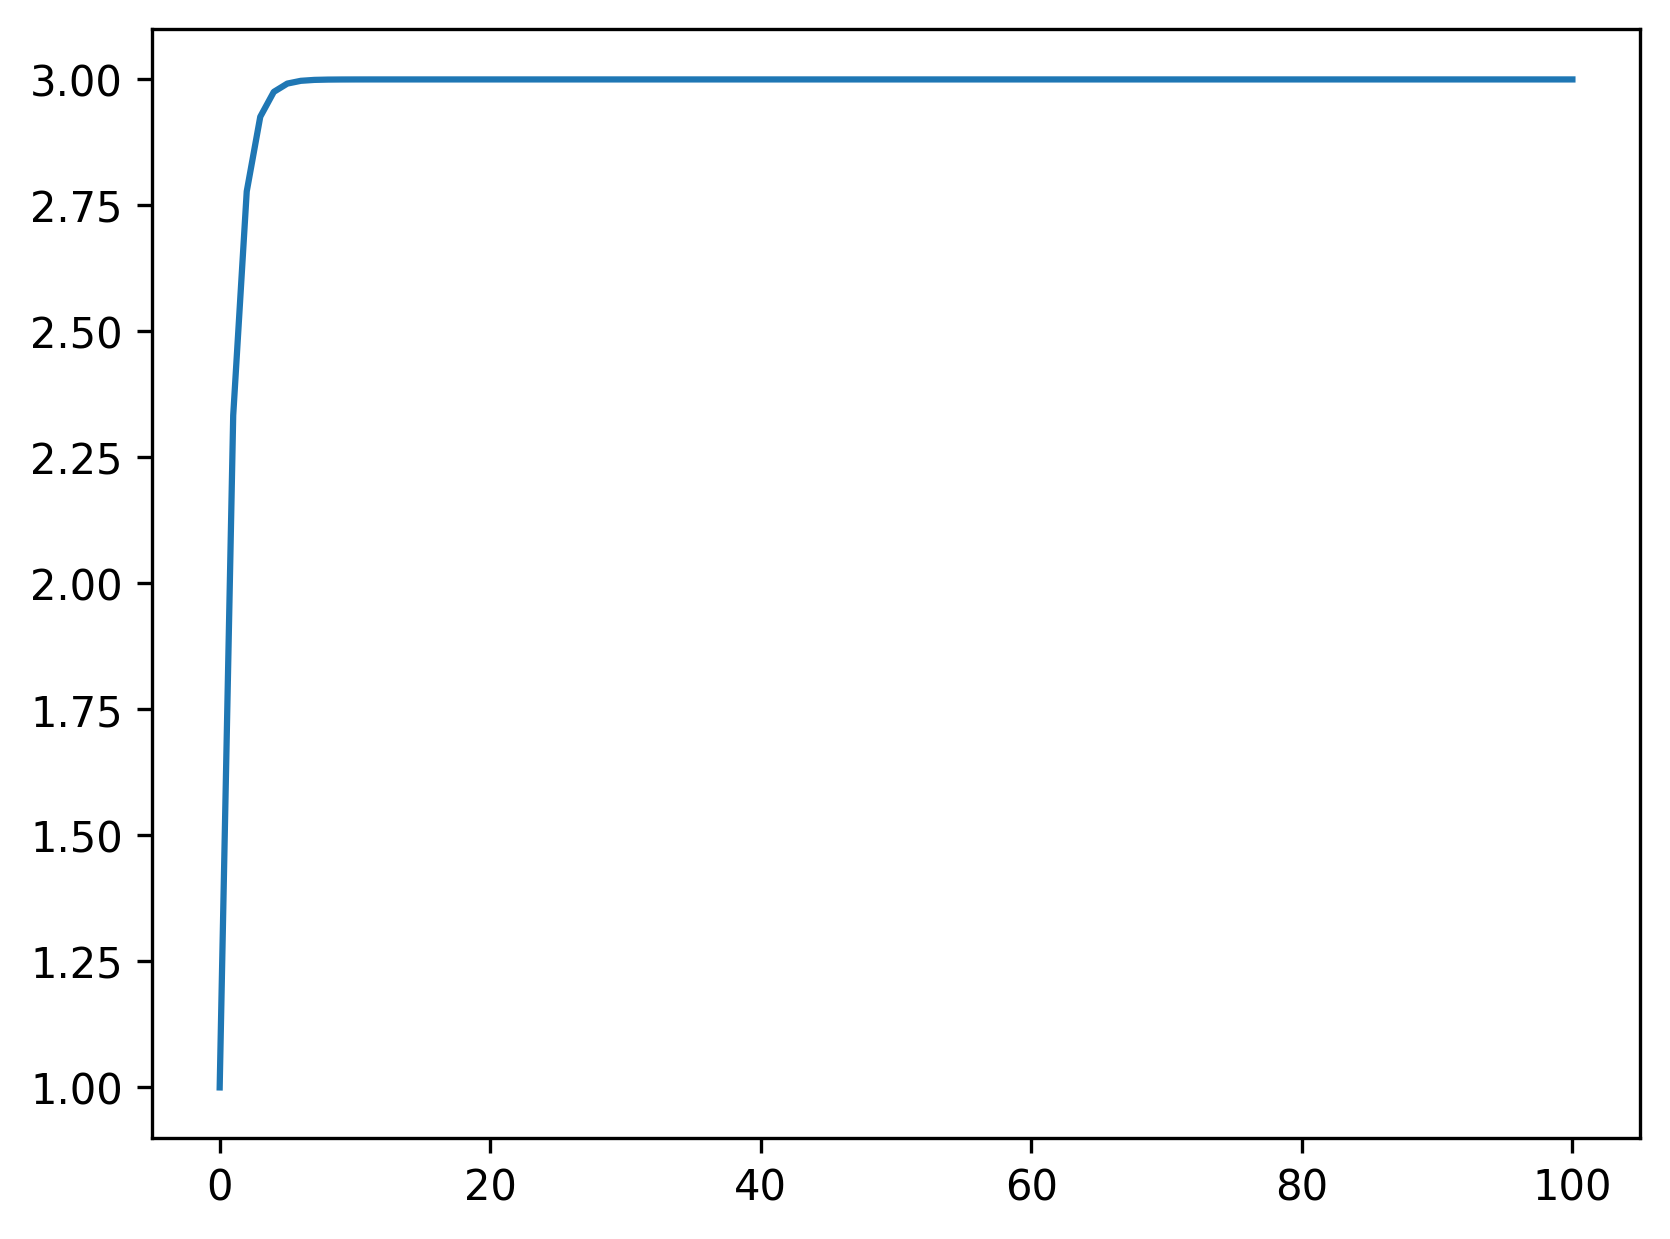

In [132]:
def area(previous: float, n: int, a: float) -> float:
    return previous + (4 * a * a * 1/3**n)

a = 1
results = dict()
results[0] = a**2

for n in range(1, 101):
    results[n] = area(results[n-1], n, a)

import matplotlib.pyplot as plt
plt.plot(results.keys(), results.values());

In [133]:
results[100]

3.0000000000000013